---
title: Generative Models
layout: collection
permalink: /Machine-Learning/Generative-Models
collection: Machine-Learning
entries_layout: grid
mathjax: true
toc: true
categories:
  - study
tags:
  - mathematics
  - statistics
  - machine-learning 
---

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

sns.set_theme()

# Generative models

### Bayesian Concept learning

In bayesian concept learning, we use only positive examples to learn.


### Number game

Given a set of numbers $\mathcal{D} = \{x_1,..., x_N \}$ coming from a mathematical concept $C$, like '*only prime numbers*' or '*powers of two*', we want to know if a new given number $\tilde{x}$ belongs to $C$. We represent this question as a probability distribution

$$
p(\tilde{x} | \mathcal{D}) \ \text{Probability of } \tilde{x} \in C
$$

Which is the so called ***posterior predictive distribution***. The posterior predictive distribution can be seen as the probability of a new datapoint $\tilde{x}$ given our already observed data $\mathcal{D}$.

We define $\mathcal{H}$ as our hypothesis space where $C(\mathcal{D}) \in \mathcal{H}$, meaning that $\mathcal{H}$ is consistent with our observed data. $\mathcal{H}$ contains then all possible concepts ($\mathcal{H}$ = {'odd', 'even', 'powers of two'}). The more data we have, the more we can rule out different Concepts in our hypothesis space, which narrows done the amount of possibilities.

#### Likelihood

Given the data, we want to see if picking one possible concept over another is better. Assuming that the samples $x_i$ are sampled uniformly at random from the extension of a concept (=set of numbers that belong to it), then the probability of sampling $x$ randomly from h is given by:

$$
\mathbb{P}(x | h) = \frac{1}{|h|}
$$

And then the probability of sampling (with replacement) N samples from h is given by:

$$
\mathbb{P}(\mathcal{D} | h) = \left( \frac{1}{|h|} \right)^N 
$$

For example, given $\mathcal{D} = \{ 16 \}$, then we get $\mathbb{P}(\mathcal{D} | h_{p-two}) = 1/6$ or $\mathbb{P}(\mathcal{D} | h_{even}) = 1/50$ for $|h| = 100$. For $\mathcal{D} = \{ 16, 8, 2, 64 \}$ we get $\mathbb{P}(\mathcal{D} | h_{p-two}) = (1/6)^4$ or $\mathbb{P}(\mathcal{D} | h_{even}) = (1/50)^4$. From this we can see that it's much more likely that our data came from the distribution of powers of two rather than from the even numbers. The likelihood ratio is 5000:1 in favor of $h_{p-two}$. Such models favor the simplest hypothesis which is consistent with the data (Occam's razor).

#### Prior

The prior is a way to formalize background knowledge. We might have some prior knowledge that we may want to introduce into our predictions. Like for example giving less weights to weird distributions like $h' = $ Powers of two except 32. This concept, given our data, is more likely than just powers of two but seems illogical to pick because of it's unnaturalness.

#### Bayes Formula

$$
\underbrace{\mathbb{P}(h | \mathcal{D})}_{\text{Posterior}} \leftarrow \underbrace{\mathbb{P}(\mathcal{D} | h)}_{\text{Likelihood}} \underbrace{\mathbb{P}(h)}_{\text{Prior}}
\Rightarrow \mathbb{P}(h | \mathcal{D}) = \frac{\mathbb{P}(\mathcal{D} | h) \mathbb{P}(h)}{\mathbb{P}(\mathcal{D})}
$$

#### Posterior

The posterior is basically the normalized product of the likelihood times the prior. The posterior here can be seen as the probability of the Concept $h$ given the observed data. 
With enough data, our posterior becomes a peak at a single concept, namely the ***MAP estimate***, or ***maximum a posteriori estimation***, which is the maximisation of the posterior. 
Thus a MAP estimate is finding $h$ for which the posterior is maximised. ($\delta$ here is the dirac function)

$$
\mathbb{P}(h | \mathcal{D}) \rightarrow \delta_{\hat{h}^{MAP}} (h), \quad \hat{h}^{MAP} = \arg \max_h \mathbb{P}(h | \mathcal{D}) 
=
\arg \max_h \left[ \log \mathbb{P}(\mathcal{D} | h) + \log \mathbb{P}(h)  \right] 
$$

For more data, the MAP converges to the MLE, because $\mathbb{P}(\mathcal{D}|h)$ dominates over $\mathbb{P(h)}$

$$
\hat{h}^{MLE} = \arg \max_h \mathbb{P}(\mathcal{D}|h) = \arg \max_h \log \mathbb{P}(\mathcal{D}|h)
$$

Because both the MLE and the MAP converge to the same hypothisis if it exists, we call them ***consistent estimators***.

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


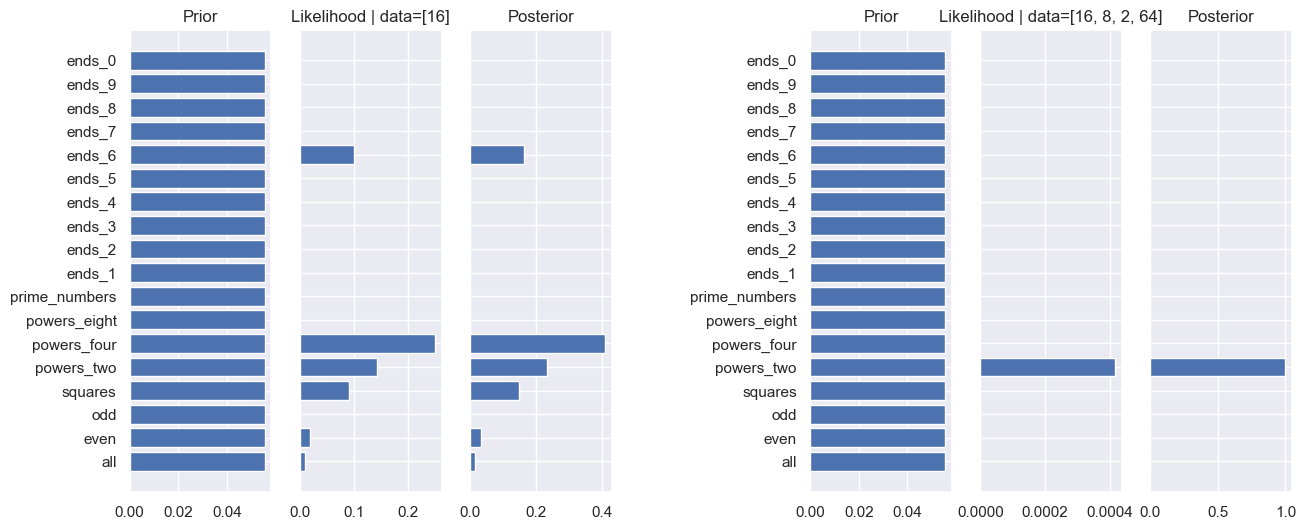

In [7]:
N = 100

all = [x for x in range(N + 1)]
even = [x for x in range(N + 1) if x % 2 == 0]
odd = [x for x in range(N + 1) if x % 2 != 0]
squares = [x**2 for x in range(N + 1) if x**2 <= 100]
powers_two = [2**x for x in range(N + 1) if 2**x <= 100]
powers_four = [4**x for x in range(N + 1) if 4**x <= 100]
powers_eight = [8**x for x in range(N + 1) if 8**x <= 100]
prime_numbers = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
ends_1 = [x for x in range(N + 1) if x % 10 == 1]
ends_2 = [x for x in range(N + 1) if x % 10 == 2]
ends_3 = [x for x in range(N + 1) if x % 10 == 3]
ends_4 = [x for x in range(N + 1) if x % 10 == 4]
ends_5 = [x for x in range(N + 1) if x % 10 == 5]
ends_6 = [x for x in range(N + 1) if x % 10 == 6]
ends_7 = [x for x in range(N + 1) if x % 10 == 7]
ends_8 = [x for x in range(N + 1) if x % 10 == 8]
ends_9 = [x for x in range(N + 1) if x % 10 == 9]
ends_0 = [x for x in range(N + 1) if x % 10 == 0]
print(ends_0)

hypothesis_space = [all, even, odd, squares, powers_two, powers_four, powers_eight, prime_numbers, ends_1, ends_2, ends_3, ends_4, ends_5, ends_6, ends_7, ends_8, ends_9, ends_0]
hypothesis_space_names = ['all', 'even', 'odd', 'squares', 'powers_two', 'powers_four', 'powers_eight', 'prime_numbers', 'ends_1', 'ends_2', 'ends_3', 'ends_4', 'ends_5', 'ends_6', 'ends_7', 'ends_8', 'ends_9', 'ends_0']

data1 = [16]

prior = 1/len(hypothesis_space)
likelihood1 = []
for hypothesis in hypothesis_space:
    in_space = True
    for number in data1:
        if number not in hypothesis:
            in_space = False
            break
    if in_space:
        likelihood1.append((1 / len(hypothesis))**len(data1))
    else:
        likelihood1.append(0)
      
post1 = (likelihood1) / (np.sum(likelihood1))  

data2 = [16, 8, 2, 64]

prior = 1/len(hypothesis_space)
likelihood2 = []
for hypothesis in hypothesis_space:
    in_space = True
    for number in data2:
        if number not in hypothesis:
            in_space = False
            break
    if in_space:
        likelihood2.append((1 / len(hypothesis))**len(data2))
    else:
        likelihood2.append(0)
      
post2 = (likelihood2) / (np.sum(likelihood2))  
      
fig, axs = plt.subplots(1, 7, figsize=(15, 6))
axs[0].set_title('Prior')
axs[0].barh(hypothesis_space_names, prior)

axs[1].set_title(f'Likelihood | data={data1}')
axs[1].barh(hypothesis_space_names, likelihood1)
axs[1].set_yticklabels([])

axs[2].set_title('Posterior')
axs[2].barh(hypothesis_space_names, post1)
axs[2].set_yticklabels([])

axs[3].axis('off')

axs[4].set_title('Prior')
axs[4].barh(hypothesis_space_names, prior)

axs[5].set_title(f'Likelihood | data={data2}')
axs[5].barh(hypothesis_space_names, likelihood2)
axs[5].set_yticklabels([])

axs[6].set_title('Posterior')
axs[6].barh(hypothesis_space_names, post2)
axs[6].set_yticklabels([])

plt.show()

### Posterior predictive distribution

The posterior predictive distribution is given by 

$$
\mathbb{P}(\tilde{x} \in  C | \mathcal{D}) = \sum_h \mathbb{P}(\tilde{x} | h) \mathbb{P}(h | \mathcal{D})
$$

Thus the posterior predictive distribution can be thought of as, what is the probability of a new $\tilde{x}$ belonging to a given hypothisis which is calculated by summing over the total probability of $\tilde{x}$ given a hypothisis $h$, weighed by the probability of the hypothesis $h$, given the previous observed data. This is called bayes model averaging. It is basically a distribution for the future predicted data based on the already observed data, and  is used for the predicting of new data. If thus we have only a few samples, our posterior is a broad distribution and therefor the posterior predictive distribution aswell, which makes sense as predicting a model from a few datapoints is difficult because many models may accurately describe the date. For increasing datapoints we then get 

$$
\mathbb{P}(\tilde{x} \in  C | \mathcal{D}) = \sum_h \mathbb{P}(\tilde{x} | h) \delta_{\hat{h}^{MAP}} (h) = \mathbb{P}(\tilde{x} |
\hat{h})
$$

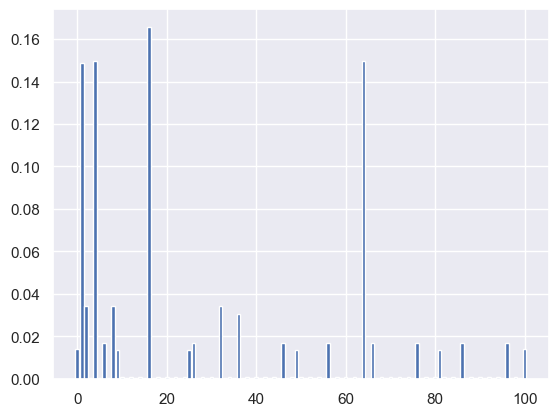

In [8]:
N = 100

all = [x for x in range(N + 1)]
even = [x for x in range(N + 1) if x % 2 == 0]
odd = [x for x in range(N + 1) if x % 2 != 0]
squares = [x**2 for x in range(N + 1) if x**2 <= 100]
powers_two = [2**x for x in range(N + 1) if 2**x <= 100]
powers_four = [4**x for x in range(N + 1) if 4**x <= 100]
powers_eight = [8**x for x in range(N + 1) if 8**x <= 100]
prime_numbers = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
ends_1 = [x for x in range(N + 1) if x % 10 == 1]
ends_2 = [x for x in range(N + 1) if x % 10 == 2]
ends_3 = [x for x in range(N + 1) if x % 10 == 3]
ends_4 = [x for x in range(N + 1) if x % 10 == 4]
ends_5 = [x for x in range(N + 1) if x % 10 == 5]
ends_6 = [x for x in range(N + 1) if x % 10 == 6]
ends_7 = [x for x in range(N + 1) if x % 10 == 7]
ends_8 = [x for x in range(N + 1) if x % 10 == 8]
ends_9 = [x for x in range(N + 1) if x % 10 == 9]
ends_0 = [x for x in range(N + 1) if x % 10 == 0]


hypothesis_space = [all, even, odd, squares, powers_two, powers_four, powers_eight, prime_numbers, ends_1, ends_2, ends_3, ends_4, ends_5, ends_6, ends_7, ends_8, ends_9, ends_0]
hypothesis_space_names = ['all', 'even', 'odd', 'squares', 'powers_two', 'powers_four', 'powers_eight', 'prime_numbers', 'ends_1', 'ends_2', 'ends_3', 'ends_4', 'ends_5', 'ends_6', 'ends_7', 'ends_8', 'ends_9', 'ends_0']

data1 = [16]

prior = 1/len(hypothesis_space)
likelihood1 = []
for hypothesis in hypothesis_space:
    in_space = True
    for number in data1:
        if number not in hypothesis:
            in_space = False
            break
    if in_space:
        likelihood1.append((1 / len(hypothesis))**len(data1))
    else:
        likelihood1.append(0)
      
post1 = (likelihood1) / (np.sum(likelihood1))  

posterior_pred = []
for i in all:
    s = 0
    for hypothesis, post in zip(hypothesis_space, post1):
        if i in hypothesis:
            s += (1 / len(hypothesis)) * post
    posterior_pred.append(s)
posterior_pred /= np.sum(posterior_pred)
plt.bar(all, posterior_pred)
plt.show()

# Binomial and Bernoulli Distribution

The Bernoulli distribution is the distribution of a success and failure where thus $X \in \{0, 1\}$

$$
X \sim \text{Ber}(\theta) \Rightarrow \text{Ber}(x | \theta) = \theta^{\mathbb{I}(x=1)}(1 - \theta)^{\mathbb{I}(x=0)}
$$

The Binomial distribution is the extension of the Bernoulli distribution to $n$ repititions, thus $X \in \{0, 1, ..., n \}$ is the number of successes

$$
X \sim \text{Bin}(n, \theta) \Rightarrow \text{Bin}(X = k | n, \theta) = \begin{pmatrix} n \\ k \end{pmatrix} \theta^k (1 - \theta)^{n - k}
$$

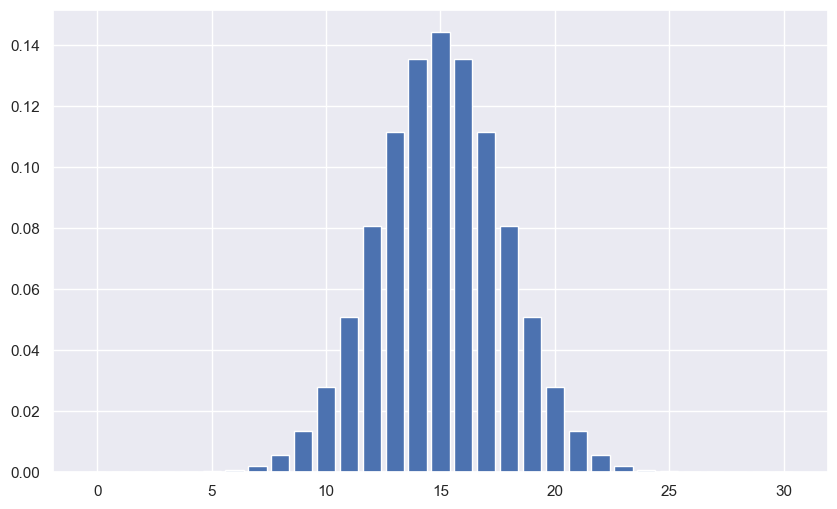

In [9]:
def binomial_distribution(n: int, k: int,  p: float) -> np.array:
    x = np.zeros(k + 1)
    for i in range(k + 1):
      x[i] = sp.special.comb(n, i) * p ** i * (1 - p) ** (n - i)  
    return x

n = 30
k = 30

plt.figure(figsize=(10, 6))
x = binomial_distribution(n, k, 0.5)
plt.bar(range(k + 1), x)
plt.show();

### Beta-Binomial Model

Let $N_1$ be the number of heads we ovbserve with $N = N_0 + N_1$, the likelihood of the binomial distribution is then 

$$
N_1 \sim \text{Bin}(N_1 | N, \theta) = \begin{pmatrix} N \\ N_1 \end{pmatrix} \theta^{N_1} (1 - \theta)^{N - N_1}
$$

Here it doesnt matter if we're given $N$ and $N_1$ or $\mathcal{D} = \{x_1, ..., x_N \}$, thus $\{N,N_1 \}$ are a sufficient statistic of the data to predict $\theta$. 
Thus $f(\mathcal{D})$ is a sufficient statistic if $\mathbb{P}(\theta | \mathcal{D}) = \mathbb{P}(\theta | f(\mathcal{D}))$.

For the prior, we want a prior over the intervall $[0, 1]$ and it would be nice if the prior has the same form as the likelihood $\mathbb{P}(\theta) \propto \theta^{\gamma_1} (1 - \theta)^{\gamma_2}$. 
Given that, the posterior would then be of the same form prior, $\mathbb{P}(\theta | \mathcal{D}) \propto \theta^{N_1 + \gamma_1}(1 - \theta)^{N_0 + \gamma_2}$. If the the prior and posterior have the same form, i.e. they come from the same probability distribution familiy, then the prior is called the conjugate prior.

In case of the Bernoulli likelihood, or binomial distribution, the conjugate prior is the so called beta distribution. 

### Beta Distribution

Beta distribution spans the unit intevall [0, 1]. For in this interval the distribution is given by:

$$
Beta(\theta | a, b) = \frac{1}{B(a, b)} \theta^{a - 1}(1 - \theta)^{b - 1} \propto \theta^{a - 1}(1 - \theta)^{b - 1}
$$

The mean of the beta function is given by

$$
\mu[Beta(a, b)] = \frac{a}{a + b}
$$

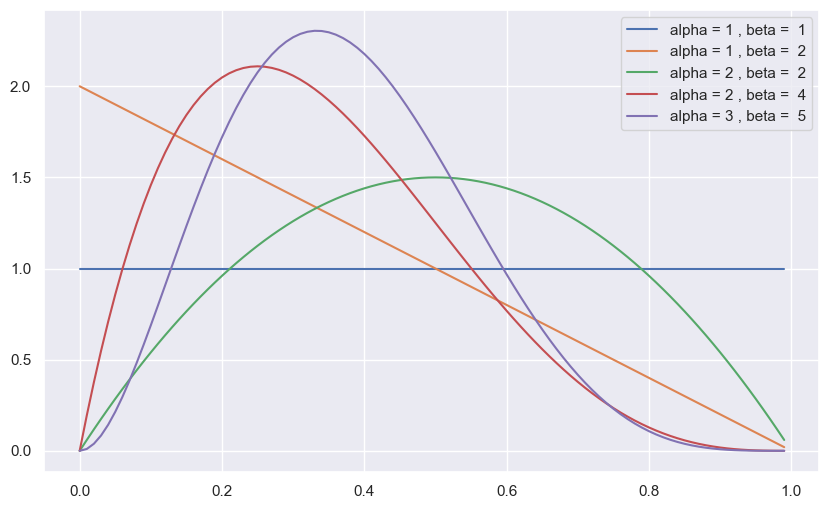

In [10]:
alpha = [1, 1, 2, 2, 3]
beta = [1, 2, 2, 4, 5]

plt.figure(figsize=(10, 6))
x = np.arange(0, 1, 0.01)
for alpha_i, beta_i in zip(alpha, beta):
  B = sp.special.beta(alpha_i, beta_i)
  beta_distribution = (1 / B) * x ** (alpha_i - 1) * (1 - x) ** (beta_i - 1)
  
  plt.plot(x, beta_distribution, label=f'alpha = {alpha_i} , beta =  {beta_i}')

plt.legend() 
plt.show();

The parameters of the prior are the so called hyper-parameters and we can use these parameters to encode our prior belief of our system. Often if we know nothing or don't want to impose any bias, we pick a uniform prior, i.e. $Beta(1, 1)$.

The posterior is then again given by the bayes formula, multiplying our likelihood with our Beta prior we get:

$$
\mathbb{P}(\theta|\mathcal{D}) \propto \text{Bin}(N_1 | N, \theta) \text{Beta}(\theta)(a, b) \propto \text{Beta}(N_1 + a, N_0 + b)
$$

The hyperparameters of the Beta distribution can also be seen as pseudo counts of an event. The strength of the prior or the equivalent smaple size is the sum of the pseudo counts $\alpha_0 = a + b$. These pseudo counts play an analogous role to the likelihood where $N_1 + N_0 = N$.

The posterior predictive distribution of this example then allows us to predict the future of observable data.

$$
\begin{align*}
\mathbb{P}(\tilde{x}=1 |\mathcal{D}) 
&= 
\int_{0}^{1} \underbrace{\mathbb{P}(\tilde{x}=1 | \theta)}_{\text{Bernoulli distribution}}
\underbrace{\mathbb{P}(\theta | \mathcal{D})}_{\text{Posterior}}d\theta \\
&= 
\int_{0}^{1} \theta \text{Beta}(\theta | N_1 + a, N_0 + b) d\theta \\
&= 
\mathbb{E}[\theta | \mathcal{D}] \\
&=
\frac{N_1 + a}{N_0 + N_1 + a + b}
\end{align*}
$$

### Overfitting and the black swan paradox

For a very small sample size, for example only observing 3 Tails, then our MLE is given by $\hat{\theta}_{MLE} = 0$, which makes the possibility of getting heads zero, caused by having only sparse data. In bayesian this can be solved by using a uniform prior by the beta distribution, the posterior then becomes the so called ***Laplace's rule of succession*** $\mathbb{P}(\tilde{x} = 1 | \mathcal{D}) = \frac{N_1 + 1}{N_0 + N_1 + 2}$ This is used hwn there are few observations or events that have not been observed to occur at all in finite sample data.

### Multinomial distribution

A mutlinomial distribution is like tossing a $K$-sided die. Let $X = (X_1, X_2, ..., X_K)$ be a random vector and $x_j$ be the number of times, side $j$ appears and $\theta_j$ being the probability that side $j$ shows up.

$$
\text{Mu}(x|n, \theta) = 
\begin{pmatrix}
  n \\ x_1 \cdot \cdot \cdot x_k
\end{pmatrix}
\prod^{K}_{j=1} \theta^{x_j}_j
$$

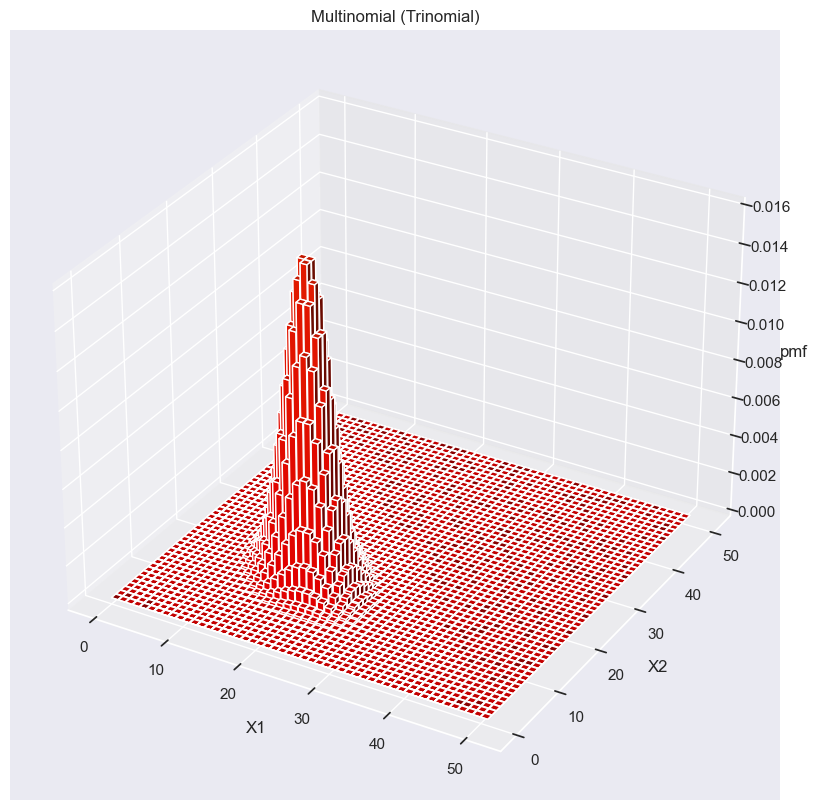

In [12]:
def ravzip(*itr):
    '''flatten and zip arrays'''
    return zip(*map(np.ravel, itr))

def plot_multinomial_pmf(n=3, p=[1/3]*3):
    from matplotlib import cm
    import matplotlib.colors as col
    from mpl_toolkits.mplot3d import Axes3D
    
    # Define figure and axes
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Generate data
    X1 = np.arange(n+1)
    X2 = np.arange(n+1)
    X, Y = np.meshgrid(X1, X2)
    Z = n - (X + Y)
    
    # Get probability
    top = sp.stats.multinomial.pmf(np.dstack((X,Y,Z)).squeeze(), n=n, p=p)
    width = depth = 1
    
    # Get distance to camera, cheaply
    zo = -(Y)  # My version of distance from camera    

    # Plot each bar (loop needed for cmap)
    cmap = cm.ScalarMappable(col.Normalize(0, len(X.ravel())), cm.hsv)

    bars = np.empty(X.shape, dtype=object)
    for i, (x, y, dz, o) in enumerate(ravzip(X, Y, top, zo)):
        j, k = divmod(i, n+1)        
        bars[j, k] = pl = ax.bar3d(x, y, 0, 0.9, 0.9, dz, color=cmap.to_rgba(dz*3500))
        pl._sort_zpos = o
        
    # Configure plot
    ax.set_title('Multinomial (Trinomial)')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('pmf')
    plt.show()
    
K = 2
n = 50
x = [0, 0]
plot_multinomial_pmf(n)

### Dirichlet multinomial model

We now want to look at the probability that a die with $K$ sides comes up as face $k$.
The likelihood then when observing $N$ dice rolls $\mathcal{D}=\{x_1, ..., x_n\}, x_i \in \{1,...,K \}$ is given by $\mathbb{P}(\mathcal{D}|\mathbf{\theta}) = \prod_{k=1}^{K} \theta_k^{N_k}$, where $N_k$ is the number of times, the $k$'th event occured.
The conjugated prior is then the so called ***Dirichles distribution***.

$$
\text{Dir}(\mathbf{\theta} | \mathbf{\alpha}) = \frac{1}{B(\mathbf{\alpha})} \prod_{k=1}^{K} \theta_k^{\alpha_i - 1}
$$

It can also be seen as the ***multivariate beta distribution***, where the $\alpha_i$ again are the so called pseudo counts. It has the mean

$$
\mathbb{E}[X_i] = \frac{\alpha_i}{\sum_k \alpha_k}
$$

The posterior is then given by 

$$
\begin{align*}
\mathbb{P}(\mathbf{\theta}| \mathcal{D}) 
&\propto 
\underbrace{\mathbb{P}(\mathcal{D} | \mathbf{\theta})}_{\text{Likelihood}}
\underbrace{\mathbb{P}(\mathbf{\theta} | \mathbf{\alpha})}_{\text{Prior}} \\
&\propto
\prod_{k=1}^{K} \theta_k^{N_k} \prod_{k=1}^{K} \theta_k^{\alpha_k - 1} \\
& \propto
\prod_{k=1}^{K} \theta_k^{N_k + \alpha_k - 1} \\
&=
\text{Dir}(\mathbf{\theta} | \alpha_1 + N_1,...,\alpha_k + N_k)
\end{align*}
$$

The posterior predictive is given by (using the following [[trick](https://stats.stackexchange.com/questions/166420/posterior-predictive-distribution-dirichlet-multinomial-model/166574#166574)]) 

$$
\begin{align*}
\mathbb{P}(\tilde{X} = j | \mathcal{D}) &= \int \mathbb{P}(\tilde{X} = j | \mathbf{\theta}) \mathbb{P}(\mathbf{\theta} | \mathcal{D}) d\mathbf{\theta} \\
&=
\int_{\mathbf{\theta}_j} \int_{\mathbf{\theta}_{-j}} \mathbb{P}(\tilde{X} = j | \mathbf{\theta}) \mathbb{P}(\mathbf{\theta} | \mathcal{D}) d\mathbf{\theta}_{-j}  d\theta_j \\
&= 
\int_{\mathbf{\theta}_j} \mathbb{P}(\tilde{X} = j | \mathbf{\theta}) \left( \int_{\mathbf{\theta}_{-j}} \mathbb{P}(\mathbf{\theta} | \mathcal{D}) d\mathbf{\theta}_{-j} \right)  d\theta_j \\
&=
\int_{\mathbf{\theta}_j} \theta_j \mathbb{P}(\theta_j | \mathcal{D})  d\theta_j \\
&=
\mathbb{E}[\theta_j | \mathcal{D}] \\
&=
\frac{N_j + \alpha_j}{\sum_k (N_k + \alpha_k)}
\end{align*}
$$

This so called ***Bayesian smoothing*** helps with the zero count problem. Bayesian smoothing works by adjusting probability estimates based on both observed data and prior knowledge, resulting in more stable and reliable estimates, particularly when the data is sparse or unevenly distributed. The smoothing process involves combining the prior distribution with the observed data to obtain a posterior distribution, which represents updated beliefs about the probabilities.